In [135]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

In [136]:
def region_growing_gray(img, seedList, delta, diagonal):
    def validPoint(x, y, img):
        if x >= 0 and x < img.shape[1] and y >= 0 and y < img.shape[0]:
            return True
        return False
    
    height, width = img.shape
    mask = np.zeros((height, width))
    
    for seed in seedList:
        y, x = seed
        loop_points = []
        loop_points.append((x, y))
        
        intensity_seed = img[y, x]
        
        while len(loop_points) != 0:
            (cx, cy) = loop_points.pop()
            intensity = img[cy, cx]
            
            if np.abs(intensity - intensity_seed) <= delta:
                mask[cy, cx] = 255
                if diagonal:
                    neighbors = [(cx - 1, cy),
                                (cx + 1, cy),
                                (cx - 1, cy-1),
                                (cx, cy - 1),
                                (cx + 1, cy - 1),
                                (cx - 1, cy + 1),
                                (cx, cy + 1),
                                (cx + 1, cy + 1)]
                else:
                    neighbors = [(cx - 1, cy),
                                (cx + 1, cy),
                                (cx, cy - 1),
                                (cx, cy + 1)]
                for (nx, ny) in neighbors:
                    if validPoint(nx, ny, img) and mask[ny, nx] == 0:
                        loop_points.append((nx, ny))
        
    return mask

def region_growing_rgb(img, seedList, delta, diagonal):
    def validPoint(x, y, img):
        if x >= 0 and x < img.shape[1] and y >= 0 and y < img.shape[0]:
            return True
        return False
    
    height, width, _ = img.shape
    mask = np.zeros((height, width))
    
    for seed in seedList:
        y, x = seed
        loop_points = []
        loop_points.append((x, y))
        
        intensity_seed = img[y, x, :]
        red_seed = intensity_seed[2]
        green_seed = intensity_seed[1]
        blue_seed = intensity_seed[0]
        
        while len(loop_points) != 0:
            (cx, cy) = loop_points.pop()
            intensity = img[cy, cx, :]
            red = int(intensity[2])
            green = int(intensity[1])
            blue = int(intensity[0])
            if abs(red - red_seed) <= delta and abs(green - green_seed) <= delta and abs(blue - blue_seed) <= delta:
                mask[cy, cx] = 255
                if diagonal:
                    neighbors = [(cx - 1, cy),
                                (cx + 1, cy),
                                (cx - 1, cy-1),
                                (cx, cy - 1),
                                (cx + 1, cy - 1),
                                (cx - 1, cy + 1),
                                (cx, cy + 1),
                                (cx + 1, cy + 1)]
                else:
                    neighbors = [(cx - 1, cy),
                                (cx + 1, cy),
                                (cx, cy - 1),
                                (cx, cy + 1)]
                for (nx, ny) in neighbors:
                    if validPoint(nx, ny, img) and mask[ny, nx] == 0:
                        loop_points.append((nx, ny)) 
    return mask


In [137]:
# Q1 - Gray
img = np.array([[10, 10, 10, 10, 10, 10, 10],
                [10, 10, 10, 69, 70, 10, 10],
                [59, 10, 60, 64, 59, 56, 60],
                [10, 59, 10, 60, 70, 10, 62],
                [10, 60, 59, 65, 67, 10, 65],
                [10, 10, 10, 10, 10, 10, 10],
                [10, 10, 10, 10, 10, 10, 10]], dtype=np.float64)

height, width = img.shape

seed1 = (int(width / 2), int(height / 2))
seed2 = (6, 6)
mask1 = region_growing_gray(img, [seed1, seed2], delta=5, diagonal=False)
mask2 = region_growing_gray(img, [seed1, seed2], delta=5, diagonal=True)

print(mask1)
print(mask2)

[[  0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 255. 255. 255. 255. 255.]
 [255. 255.   0. 255.   0. 255. 255.]
 [255. 255. 255. 255.   0. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255.]]
[[255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255.   0.   0. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255.   0. 255. 255.]
 [255. 255. 255. 255.   0. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255.]]


In [138]:
# Q3 - RGB Diagonal
img = cv.imread('./images/Coin.jpg')

height, width, _ = img.shape

seed1 = (int(width / 2), int(height / 2))
seed2 = (int(width / 2) + 10, int(height / 2) + 10)
mask = region_growing_rgb(img, [seed2], delta=90, diagonal=True)

cv.imwrite("RegionGrowingRGB.jpg", mask)

True

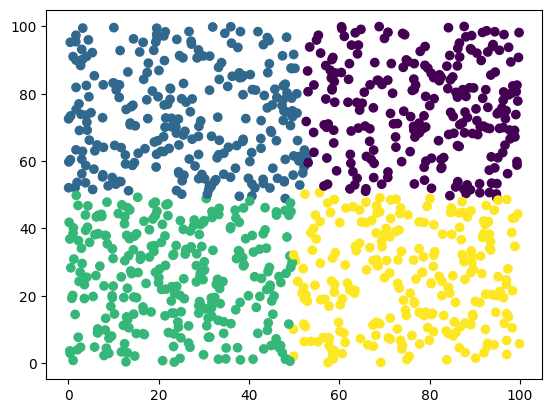

In [163]:
# K-mean Clustering
points = np.random.uniform(0, 100, [1000, 2])
k = 5

x = [point[0] for point in points]
y = [point[1] for point in points]

# # Find out how many cluster should there be
# inertias = []
# for i in range(1, len(points) + 1):
#     kmeans = KMeans(n_clusters=i, n_init='auto')
#     kmeans.fit(points)
#     inertias.append(kmeans.inertia_)
    
# plt.plot(range(1, len(points) + 1), inertias, marker='o')
# plt.title('Elbow method')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.show() 

kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(points)
plt.scatter(x, y, c=kmeans.labels_)
plt.show()  

[1 1 2 2 3 0 1 0 0 1 1 0 0 2 3 3 1 0 3 1 3 2 2 1 1 0 3 3 1 1 0 0 2 2 0 1 3
 3 0 2 2 0 3 0 3 3 3 2 2 0 0 1 0 1 0 2 3 3 3 2 1 2 3 3 0 1 1 2 3 1 3 3 2 1
 1 3 1 3 0 0 3 2 0 2 2 0 2 2 0 2 1 0 2 2 0 0 2 3 0 2 0 1 1 1 2 0 2 2 0 1 3
 1 0 3 0 1 2 0 2 3 3 2 2 0 2 1 1 3 1 1 0 1 3 1 2 3 1 1 1 3 2 2 0 1 1 2 0 2
 3 3 3 0 3 0 3 1 0 3 2 2 3 2 2 3 3 1 3 1 0 0 1 0 0 2 1 3 0 2 3 1 2 3 3 3 2
 3 0 2 0 1 2 1 1 3 3 1 3 0 3 0 2 0 2 1 1 0 0 0 3 2 0 2 1 1 3 2 0 2 0 3 2 1
 2 0 1 3 3 2 3 1 2 2 2 2 3 1 0 3 3 2 3 0 2 1 1 2 0 2 1 1 3 3 3 0 1 1 2 1 2
 0 0 2 1 1 3 1 1 1 1 1 1 3 0 1 3 2 2 0 2 3 2 2 3 3 1 1 1 2 1 0 1 0 1 0 2 2
 2 1 1 2 0 2 0 0 3 3 1 2 3 1 2 1 1 3 2 0 0 2 3 2 0 3 0 3 2 0 3 3 1 3 1 0 2
 1 2 0 0 0 1 2 0 2 2 0 2 0 3 3 0 1 1 0 2 3 2 1 3 2 2 0 0 3 1 1 2 3 1 1 3 0
 2 3 1 2 1 0 0 1 1 0 2 0 2 2 3 1 1 3 0 2 0 0 3 3 2 2 0 0 3 3 0 0 3 2 2 3 0
 0 0 3 0 0 3 3 0 3 3 3 3 3 3 3 1 2 0 0 0 2 1 1 2 0 3 3 3 1 3 1 3 0 3 0 0 3
 1 1 0 2 1 3 1 3 3 2 1 2 2 2 1 2 1 1 0 3 1 3 1 2 1 3 2 0 0 3 2 3 1 0 1 2 0
 0 0 2 2 2 2 0 2 2 0 1 2 